In [1]:
import numpy as np
import cv2
import imutils
from imutils import contours
from imutils import perspective
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt

# Text Scanner

In [2]:

image = cv2.imread(r"D:\open-cv\projects\test_image.jpeg")
image = imutils.resize(image, height = 500)
orig = image.copy()

def midpoint(ptA, ptB):
 return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


original image


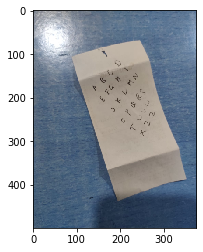

In [3]:

grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayImageBlur = cv2.blur(grayImage,(3,3))
edgedImage = cv2.Canny(grayImageBlur, 45, 200, 3)


plt.imshow(image)
print('original image')

In [4]:
allContours = cv2.findContours(edgedImage.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
allContours = imutils.grab_contours(allContours)
allContours = sorted(allContours, key=cv2.contourArea, reverse=True)[:1]

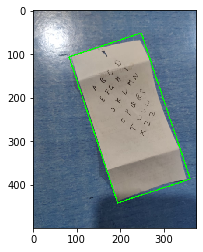

In [5]:

for c in allContours:

    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)

    box = np.array(box, dtype="int")
    box = perspective.order_points(box)
    
    orig = cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    

plt.imshow(orig)


In [6]:

(tl, tr, br, bl) = box

widthA = dist.euclidean((tl[0],tr[0]),(tl[1],tr[1]))
widthB = dist.euclidean((bl[0],br[0]),(bl[1],br[1]))
maxWidth = max(int(widthA), int(widthB))
heightA = dist.euclidean((tl[0],bl[0]),(tl[1],bl[1]))
heightB = dist.euclidean((tr[0],br[0]),(tr[1],br[1]))
maxHeight = max(int(heightA), int(heightB))

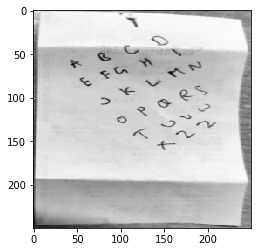

In [7]:
dst = np.array([[0,0],[maxWidth-1, 0],
    [maxWidth-1, maxHeight-1],[0, maxHeight-1]], dtype="float32")

transformMatrix = cv2.getPerspectiveTransform(box, dst)

scan = cv2.warpPerspective(image, transformMatrix, (maxWidth, maxHeight))
scang = cv2.cvtColor(scan, cv2.COLOR_BGR2GRAY)
plt.imshow(scang,cmap='gray')

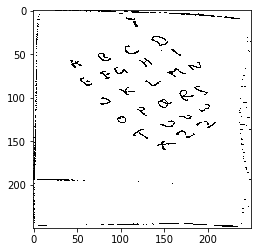

In [8]:
from skimage.filters import threshold_local

T = threshold_local(scang,9, offset=8, method="gaussian")
scanBW = (scang> T).astype("uint8") * 255

plt.imshow(scanBW,cmap='gray')


# Text Aligner

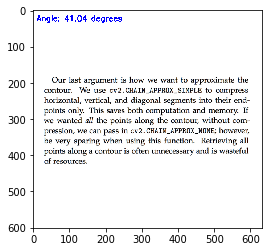

In [9]:
#not working on this image

image1 =  cv2.imread(r"D:\open-cv\projects\text-skew-correction\images\pos_41.png")

gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]

if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

(h, w) = image1.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image1, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


plt.imshow(rotated)